# Linear Regression
## Boom Bikes Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

The objective of this case study is to identify which variables are significant in predicting the demand for shared bikes.

#### Business Goal:

We have to model the demand for shared bikes with the available independent variables. It will be used to understand how exactly the demands vary with different features. 



In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

## Reading the Data

In [3]:
# Importing "day.csv"
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the data types, shape etc. for all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking for missing values in columns
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Visualising the Data


Dat dictionary - Below is the reference

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [7]:
# Correcting data types
df[["instant","season","yr","mnth","holiday","weekday","workingday","weathersit"]] = df[["instant","season","yr","mnth","holiday","weekday","workingday","weathersit"]].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    object 
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 91.4+ KB


In [8]:
# Mapping string values to categorical columns
df["season"] = df["season"].replace({1:'Spring',2:"Summer",3:"Fall",4:"Winter"})
df["mnth"] = df["mnth"].replace({1:'January',2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
df["weekday"] = df["weekday"].replace({0:"Sunday",1:'Monday',2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
df["weathersit"] = df["weathersit"].replace({1:"Clear + Partly Cloudy",2:"Mist + Cloudy",3:"Light Precipitation",4:"Heavy Precipitation"})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Visualization

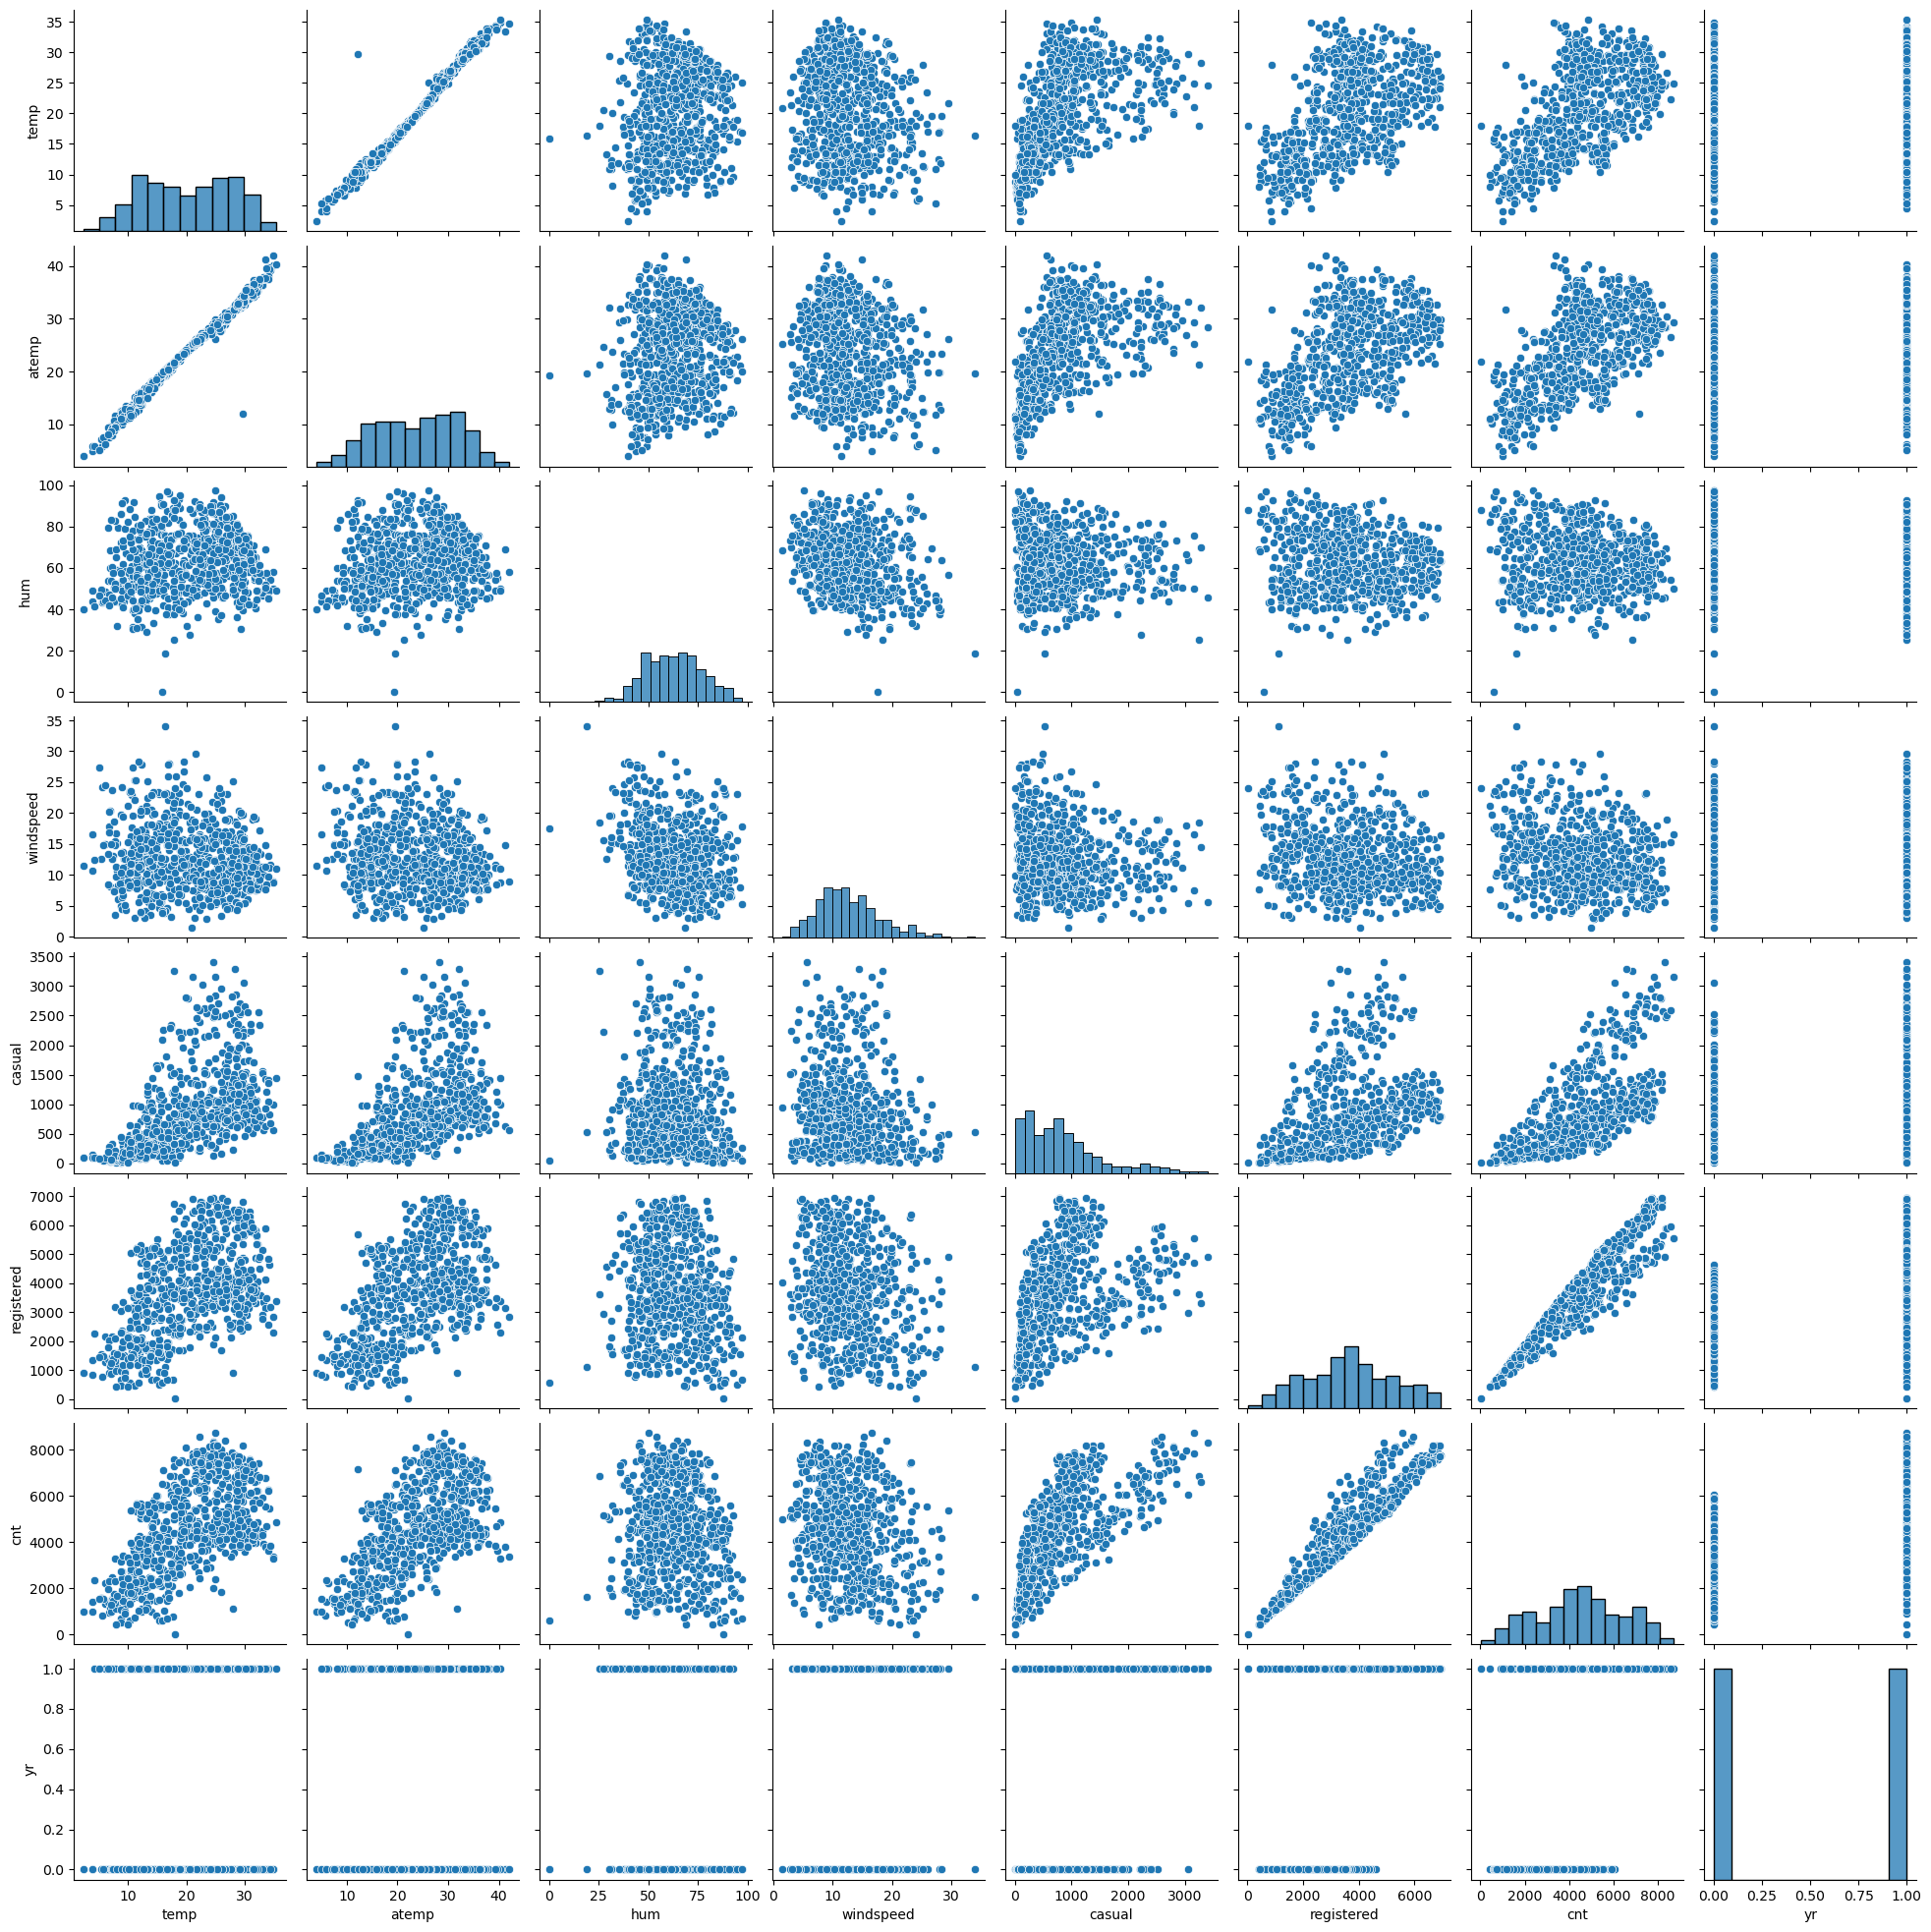

In [9]:
# Visualising numerical variables

sns.pairplot(df[["temp",'atemp',"hum","windspeed","casual","registered","cnt","yr"]])
plt.show()

#### Following are the observations:
1. Count is high in Year (Yr) 1 which is 2019. 
2. Temp and aTemp - Resemble a linear line for cnt.
3. Casual + Registered = Cnt so we will consider Cnt in our model. so drop Casual and Registered. 
4. temp and atemp follow similar distribution. So we will use Actual Temperature (atemp).
5. There is some linearity seen above between other variables and cnt so a linear regression model can be used

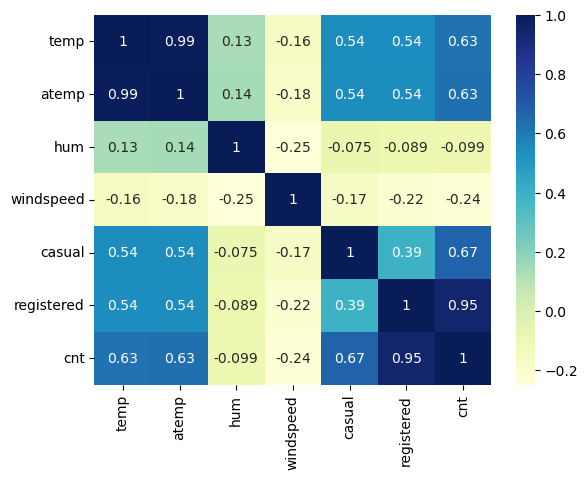

In [10]:
# Check correlations between numerical variables
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Following can be inferred from above:
1. atemp and temp are highly correlated with cnt
2. casual and registered are highly correlated with cnt which is expected since casual + registered = cnt

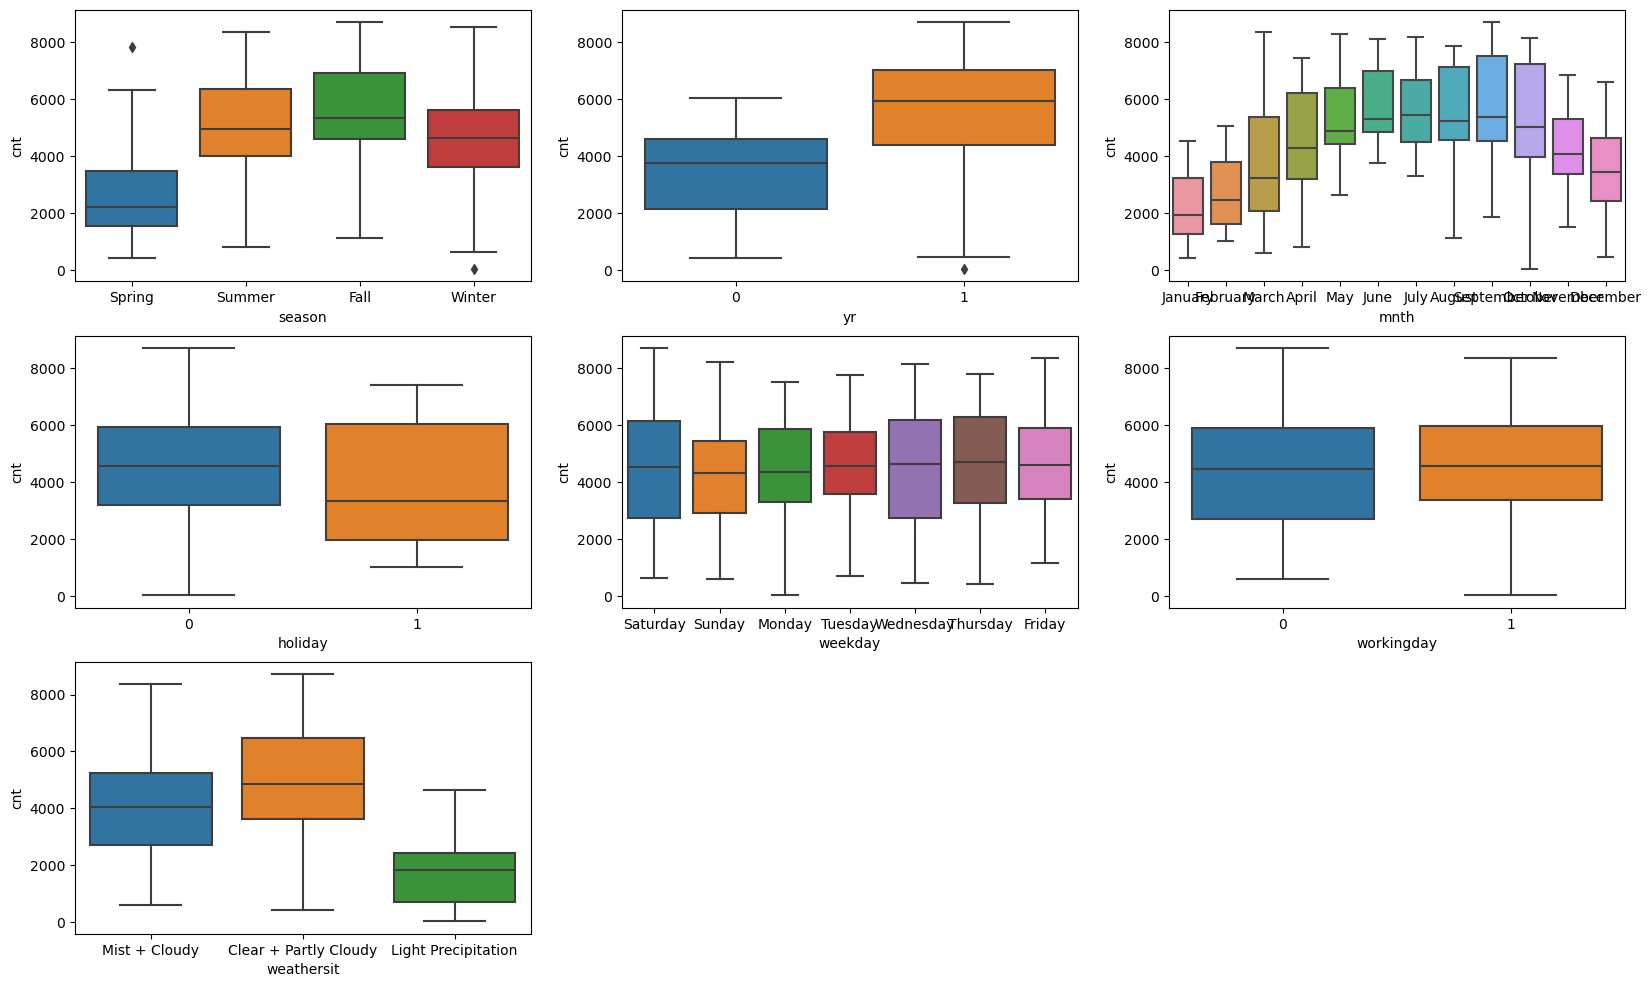

In [11]:
# Visulaising categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

#### Following can be inferred from above:
1. Significant increase in cnt of bikers where weather is 1 (Clear, Few clouds, Partly cloudy, Partly cloudy)
2. Mean cnt of bikers is not significantly different during Working days or Weekdays
3. Cnt of bikers is highest during the months of 7, 8, 9 and 10th months (July – October).
4. In 2019 there is significant increase in the number of bikers (Cnt is significantly higher)
5. Season 3(Fall) the average bikers count(cnt) is significantly higher than other seasons

## Data Preparation

In [12]:
# Dropping columns which are of no use for model creation
df.drop(["instant","dteday","temp","casual","registered"],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,11.46350,43.6957,12.522300,1600


In [13]:
# Creating dummy variables for categorical variables
df1 = pd.get_dummies(df,columns=["season","mnth","weekday","weathersit"],drop_first=True)
df1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# Changing all data types to numeric
df1 = df1.apply(pd.to_numeric)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    int64  
 1   holiday                         730 non-null    int64  
 2   workingday                      730 non-null    int64  
 3   atemp                           730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_Spring                   730 non-null    uint8  
 8   season_Summer                   730 non-null    uint8  
 9   season_Winter                   730 non-null    uint8  
 10  mnth_August                     730 non-null    uint8  
 11  mnth_December                   730 non-null    uint8  
 12  mnth_February                   730 

In [15]:
# Dividing data into train and test sets
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [16]:
# Rescaling atemp, hum, windspeed and cnt in df_train
scaler = MinMaxScaler()
df_train[['atemp','hum','windspeed','cnt']] = scaler.fit_transform(df_train[['atemp','hum','windspeed','cnt']])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
# Dividing df_train into X and y for model building
y_train = df_train.pop('cnt')
X_train = df_train

## Model Building

In [18]:
# Running RFE with output number of variables as 15. Post dummy variable crreation, the number of tables went upto 29. 
# So now by using RFE we will reduce the number of variables down to 15 for further model evaluation. 
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# Checking the columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_January', 'mnth_July',
       'mnth_September', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light Precipitation', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [19]:
# Creating X_train_ref with REF selecting variables

X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_Spring,season_Winter,mnth_January,mnth_July,mnth_September,weekday_Saturday,weekday_Sunday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,0,1,0,0,1


In [20]:
# Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

# Checking statistical summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.66e-188
Time:                        19:53:11   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [21]:
# Dropping constant
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

#### Rebuilding model after dropping holiday

In [22]:
# Dropping holiday since it is highly insignificant in presence of other variables as seen with the high p-value
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

# Adding constant variable
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.66e-188
Time:                        19:53:11   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Rebuilding model after dropping hum

In [23]:
# Dropping hum since it has very high VIF when all variables are significant
X_train_new = X_train_new.drop(["hum"], axis = 1)

# Adding constant variable
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.51e-186
Time:                        19:53:11   Log-Likelihood:                 502.89
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     496   BIC:                            -918.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [24]:
# Checking VIF for all variables of new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,13.71
2,atemp,12.74
3,windspeed,4.50
9,weekday_Saturday,3.90
10,weekday_Sunday,3.66
4,season_Spring,2.81
0,yr,2.07
5,season_Winter,1.75
6,mnth_January,1.65
12,weathersit_Mist + Cloudy,1.58


#### Rebuilding model after dropping workingday

In [25]:
# Dropping workingday since it has very high VIF when all variables are significant
X_train_new = X_train_new.drop(["workingday"], axis = 1)

# Adding constant variable
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Checking statistical summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          1.35e-184
Time:                        19:53:11   Log-Likelihood:                 495.47
No. Observations:                 510   AIC:                            -964.9
Df Residuals:                     497   BIC:                            -909.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [26]:
# Checking VIF for all variables of new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.66
2,windspeed,3.95
3,season_Spring,2.25
0,yr,2.06
5,mnth_January,1.60
11,weathersit_Mist + Cloudy,1.53
4,season_Winter,1.41
6,mnth_July,1.35
8,weekday_Saturday,1.22
9,weekday_Sunday,1.21


#### Now since all variables are significant and VIF values are less than 5, we can consider this to be the final model with 12 parameters
1. R-squared is 83.3% and Adjusted R-squared is 83% which is good to accept the model
2. Also, Prob (F-statistic) ~ 0 which indicates that the model is significant

## Validating Assumptions of Linear Regression

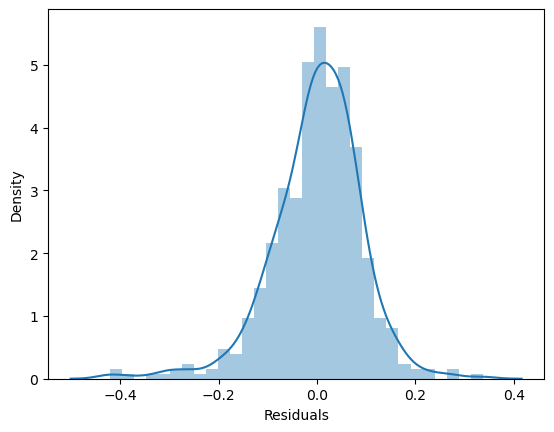

In [27]:
# Creating y_train_pred
y_train_pred = lm.predict(X_train_lm)

# Finding residuals
res = y_train - y_train_pred

# Visualizing distribution of residuals
sns.distplot(res)
plt.xlabel("Residuals")
plt.show()

#### Residuals are approximately normally distributed with mean centered at 0 and hence the model is valid

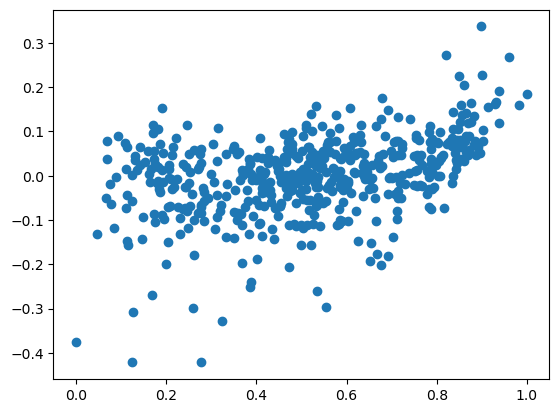

In [28]:
# Checking if error terms are independent of each other
plt.scatter(y_train,res)
plt.show()

#### There does not seem to be any sort of a pattern in the residuals, so the error terms are idependent of each other

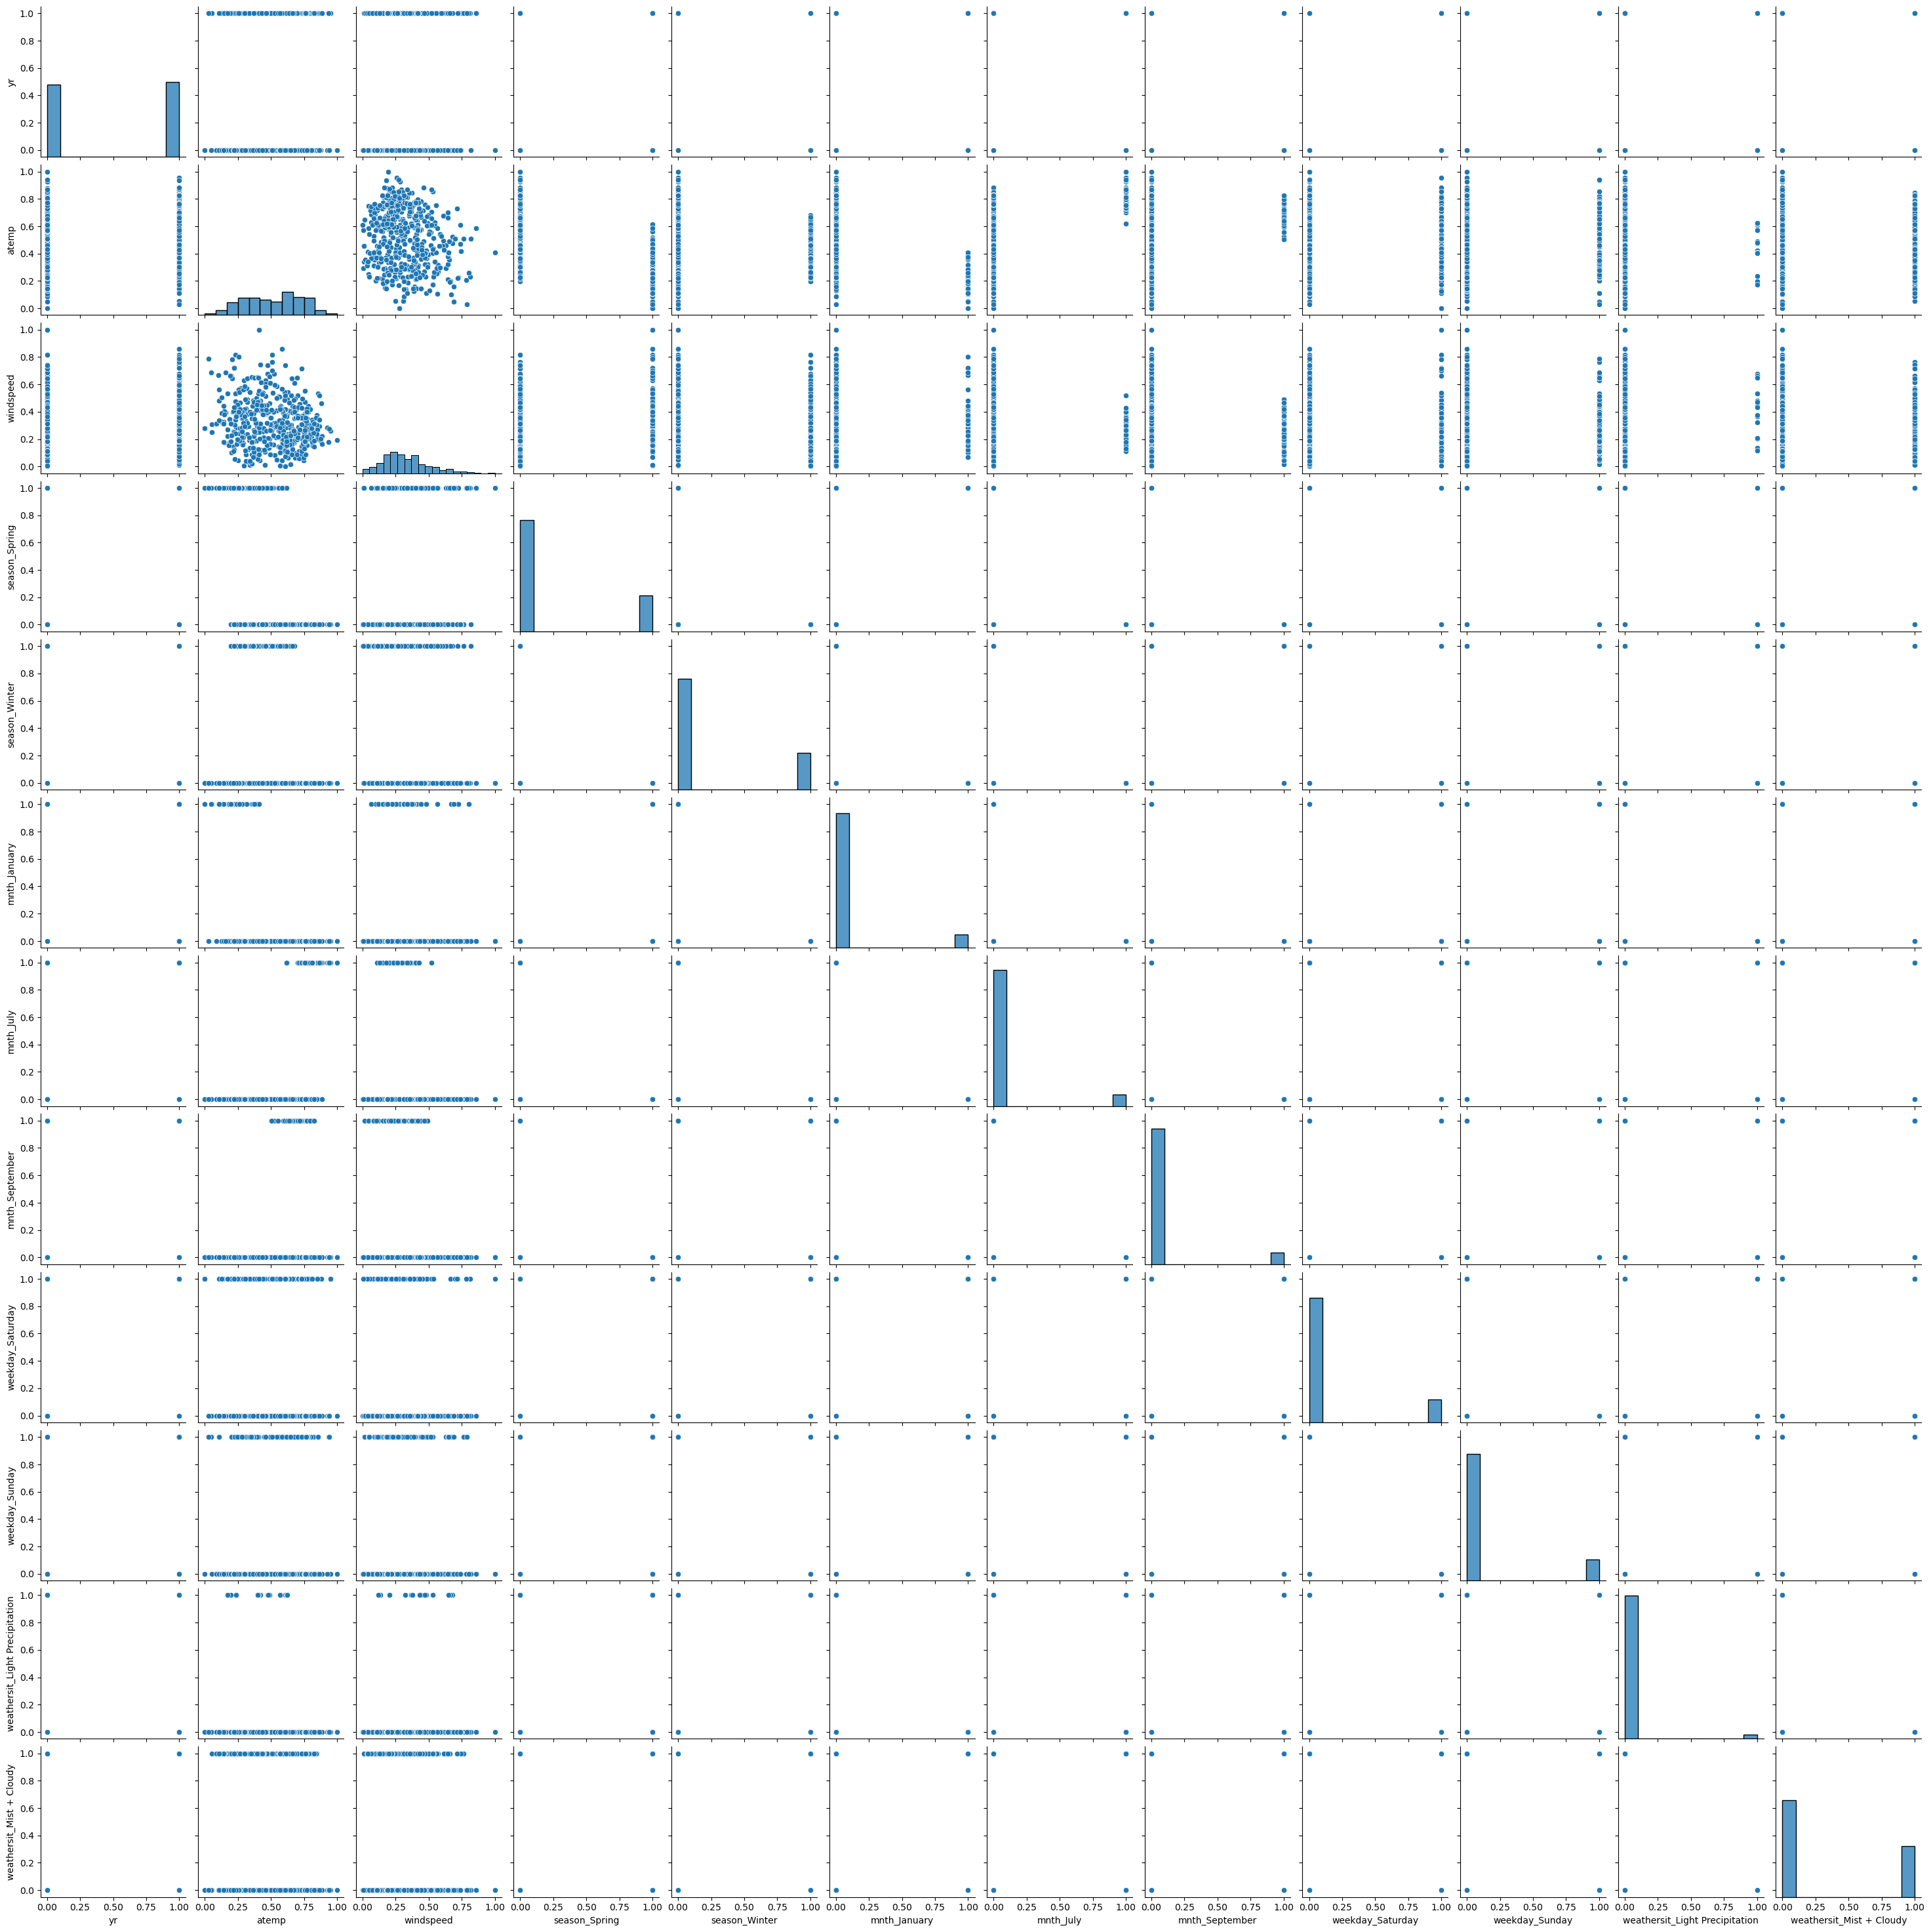

In [29]:
# Checking if there is linearity between any variable and cnt to verify if a linear regression model can be used

sns.pairplot(X_train_new)
plt.show()

#### There is no clear relationship between any of the variable in the final model, so there is no multicolinearity that exists

## Making Predictions Using the Final Model

In [30]:
# Rescaling atemp, hum, windspeed and cnt in df_test
df_test[['atemp','hum','windspeed','cnt']] = scaler.transform(df_test[['atemp','hum','windspeed','cnt']])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
# Dividing into X and y

y_test = df_test.pop('cnt')
X_test = df_test

In [32]:
# Creating X_test_new after droppping variables which are not there in the final model
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

# Making predictions using final model
y_test_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

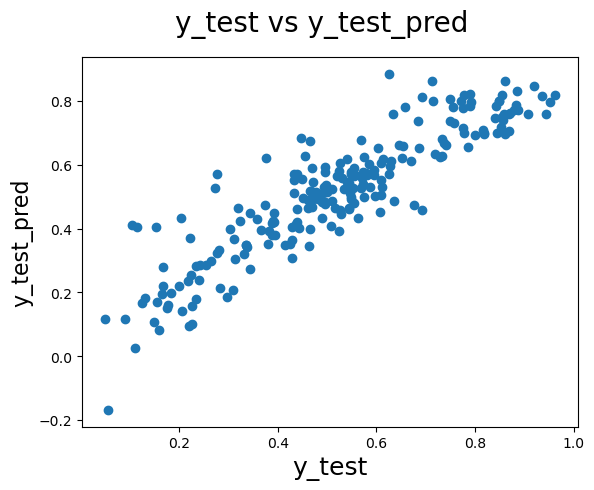

In [33]:
# Visualizing y_test vs y_test_pred

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

In [34]:
# R-squared value for the final model on test set
r2 = r2_score(y_test, y_test_pred)
print(r2)

0.8068756775238133


In [35]:
# Adjusted R-squared value for the final model on test set
Adj_r2 = 1-(1-r2)*((df_test.shape[0]-1)/(df_test.shape[0]-10-1))
print(Adj_r2)

0.7975908543278427


#### R-squared is 83.3% on train set and 80.6% on test set
#### Adjusted R-squared is 82.9% on train set and 79.7% on test set

In [36]:
X_test_new.head()

,const,yr,atemp,windspeed,season_Spring,season_Winter,mnth_January,mnth_July,mnth_September,weekday_Saturday,weekday_Sunday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
184,1.0,0,0.769660,0.084219,0,0,0,1,0,0,0,0,1
535,1.0,1,0.842587,0.153728,0,0,0,0,0,0,0,0,0
299,1.0,0,0.496145,0.334206,0,1,0,0,0,0,0,0,1
221,1.0,0,0.795343,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,0.741471,0.537414,0,0,0,0,0,0,0,0,0


#### These values are acceptable so the model is valid with 12 parameters namely:
 -1 yr
 -2 atemp
 -3 windspeed
 -4 season_Spring
 -5 season_Winter
 -6 mnth_January
 -7 mnth_July
 -8 mnth_September
 -9 weekday_Saturday
 -10 weekday_Sunday
 -11 weathersit_Light Precipitation
 -12 weathersit_Mist + Cloudy

We can see that the equation of our best fitted line based on the final model is:

$ cnt = 0.235  \times  yr + 0.446  \times  atemp - 0.1379  \times  windspeed - 0.1379 \times season_spring + 0.034 \times season_winter - 0.0445 \times mnth_january - 0.0622 \times mnth_july + 0.0558 \times mnth_september + 0.0155 \times weekday_saturday - 0.0426 \times weekday_sunday - 0.2842 \times weathersit_light precipitation - 0.0808 \times weathersit_mist cloudy $